<a href="https://colab.research.google.com/github/MasterSlyer10/CSMODEL/blob/main/MCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Dataset Description



The dataset we are using is called "Stroke Prediction" and it is used to predict a patients likelihood of experiencing a stroke based on parameters such as their gender, age, diseases they might have, as well as if they smoke.

## Data Collection
The dataset used in this research was obtained from a confidential source. Due to the confidential nature of the data, details about the specific source are not disclosed to maintain privacy and adhere to the terms of use. The data is intended for educational purposes only, and any utilization for research purposes requires proper crediting to the author, as specified by the source.

The dataset is from: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data   

By the author: Federico Soriano Palacios  
LinkedIn: https://www.linkedin.com/in/federico-soriano-palacios/  
Kaggle: https://www.kaggle.com/fedesoriano  
Github: https://github.com/fedesoriano

In [43]:
stroke_df = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')

In [44]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Each row in the dataset is a patient and each column is a characteristic of each patient with the last column "stroke" being whether or not they had a stroke.

There are a total of 5110 observations and 12 variables in the dataset.

## Variable Description

The following descriptions of the variables are directly gotten from the source webpage of the dataset.

1.) id: Unique identifier  
2.) gender: "Male", "Female", or "Other" to specify the individuals gender  
3.) age: Age of the patient  
4.) hypertension:  1 If the patient has hypertension, 0 If the patient has no hypertension  
5.) heart_disease: 1 If the patient has heart disease, 0 If the patient has no heart disease  
6.) ever_married: "No" or "Yes" if the person has married  
7.) work_type: "children", "Govt_jov", "Never_worked", "Private", or "Self-employed"  
8.) Residence_type: "Rural" or "Urban"  
9.) avg_glucose_level: average glucose level in the blood of the patient  
10.) bmi: body mass index of the patient  
11.) smoking_status: "formerly smoked", "never smoked", "smokes", or "Unknown" meaning information of the patient was not available  
12.) stroke: 1 If the patient had a stroke, 0 If the patiend didn't have a stroke


# Data Cleaning

Checking for any null values

In [45]:
stroke_df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [46]:
stroke_df['bmi'].isnull().sum()

201

In [47]:
stroke_df.shape

(5110, 12)

Dropping observations with null values for "bmi"

In [48]:
stroke_df = stroke_df.dropna(subset='bmi')

In [49]:
stroke_df.shape

(4909, 12)

In [50]:
stroke_df.tail(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5087,26214,Female,63.00,0,0,Yes,Self-employed,Rural,75.93,34.7,formerly smoked,0
5088,22190,Female,64.00,1,0,Yes,Self-employed,Urban,76.89,30.2,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5090,4211,Male,26.00,0,0,No,Govt_job,Rural,100.85,21.0,smokes,0
5091,6369,Male,59.00,1,0,Yes,Private,Rural,95.05,30.9,never smoked,0
5092,56799,Male,76.00,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5096,41512,Male,57.00,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5097,64520,Male,68.00,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0


Setting all "age" values for all observations to integers by rounding from the original float value

In [51]:
stroke_df['age'] = stroke_df['age'].round()

In [52]:
stroke_df['age'] = stroke_df['age'].astype(int)

In [53]:
display(stroke_df.dtypes)

id                     int64
gender                object
age                    int32
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [54]:
stroke_df = stroke_df.drop_duplicates()

In [55]:
stroke_df.shape

(4909, 12)

# Exploratory Data Analysis

## Summary Statistics

In [56]:
print(stroke_df.describe())

                 id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865553      0.091872       0.049501   
std    20995.098457    22.554865      0.288875       0.216934   
min       77.000000     0.000000      0.000000       0.000000   
25%    18605.000000    25.000000      0.000000       0.000000   
50%    37608.000000    44.000000      0.000000       0.000000   
75%    55220.000000    60.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4909.000000  4909.000000  4909.000000  
mean          105.305150    28.893237     0.042575  
std            44.424341     7.854067     0.201917  
min            55.120000    10.300000     0.000000  
25%            77.070000    23.500000     0.000000  
50%            91.680000    28.100000     0.000000  
75%           113.570000    33.100000     0

Exploring the distrubtion over all age's of the patients in order to understand the age range of the observations

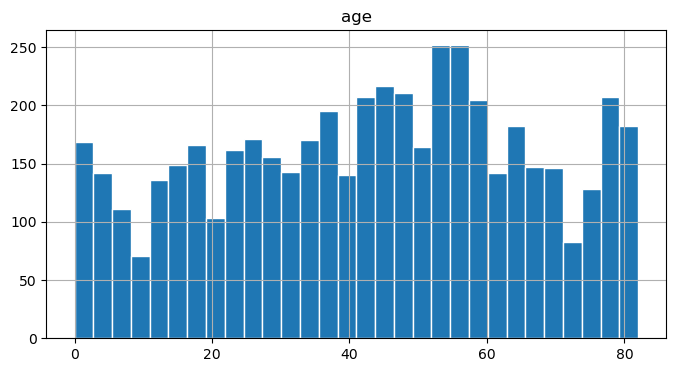

In [57]:
stroke_df.hist("age", bins=30, edgecolor='w', figsize=(8,4))
plt.show()

Exploring the proportion of males to females in the dataset

In [58]:
gender_counts = stroke_df['gender'].value_counts()
proportion_male = gender_counts['Male'] / len(stroke_df)
proportion_female = gender_counts['Female'] / len(stroke_df)
print(f"Proportion of males: {proportion_male:.2f}")
print(f"Proportion of females: {proportion_female:.2f}")


Proportion of males: 0.41
Proportion of females: 0.59


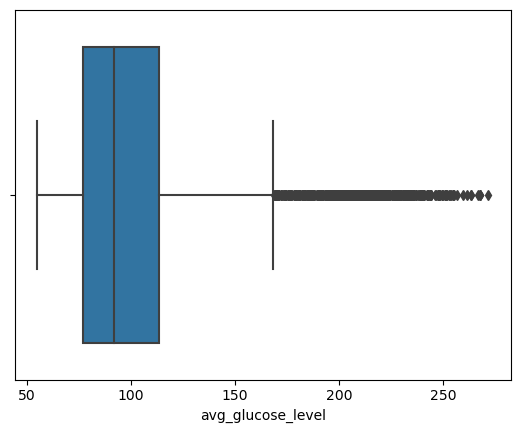

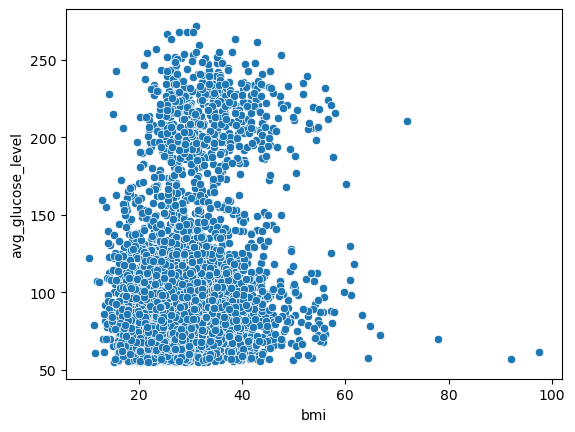

ValueError: could not convert string to float: 'Male'

In [59]:
# Box plot of "avg_glucose_level" variable
sns.boxplot(x=stroke_df['avg_glucose_level'])
plt.show()

# Scatter plot of "bmi" vs "avg_glucose_level"
sns.scatterplot(x=stroke_df['bmi'], y=stroke_df['avg_glucose_level'])
plt.show()

# Correlation matrix
corr_matrix = stroke_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


# Research Question